In [2]:
from astroquery.gaia import Gaia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.animation as animation

In [3]:
# https://gea.esac.esa.int/archive/documentation/GDR3/Gaia_archive/chap_datamodel/sec_dm_astrophysical_parameter_tables/ssec_dm_astrophysical_parameters.html

# teff_gspphot: Temperature effective (K)
# lum_flame: Luminosity (Solar luminosity)
# age_flame  (Gyr)
# mass_flame (Solar mass)
# radius_flame (Solar radius)
# evolstage_flame

job = Gaia.launch_job("""
    SELECT TOP 10000
        source_id, teff_gspphot, lum_flame, age_flame, mass_flame, radius_flame, evolstage_flame, flags_flame 
        FROM gaiadr3.astrophysical_parameters 
            WHERE teff_gspphot IS NOT NULL
            AND lum_flame IS NOT NULL
""")

In [4]:
# Fetch results as a Pandas DataFrame

# results = job.get_results()
# data = results.to_pandas()

# print(data.head())
# data.to_csv('stellar.csv')

In [5]:
data = pd.read_csv('stellar.csv')

In [6]:
# https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectral_class.html

orange = matplotlib.colors.to_rgb("orange")
red = matplotlib.colors.to_rgb("red")
yellow = matplotlib.colors.to_rgb("yellow")
lightyellow = matplotlib.colors.to_rgb("lightyellow")
white = matplotlib.colors.to_rgb("white")

def blend(c1, c2, b1, b2, k):
    l = (k - b2) / (b1 - b2)
    r = 1 - l 
    return (c1[0] * l + c2[0] * r, c1[1] * l + c2[1] * r, c1[2] * l + c2[2] * r)

def color(k):
    if k > 28000:
        return "royalblue"
    elif k > 10000:
        return "cornflowerblue"
    elif k > 8000:
        return "white"
    elif k > 7000:
        return blend(white, lightyellow, 8000, 7000, k)
    elif k > 6500:
        return "lightyellow"
    elif k > 5500:
        return blend(lightyellow, yellow, 6500, 5500, k)
    elif k > 5200:
        return "yellow"
    elif k > 4600:
        return blend(yellow, orange, 5200, 4600, k)
    elif k > 3800:
        return "orange"
    elif k > 3200:
        return blend(orange, red, 3800, 3200, k)
    else:
        return "red"

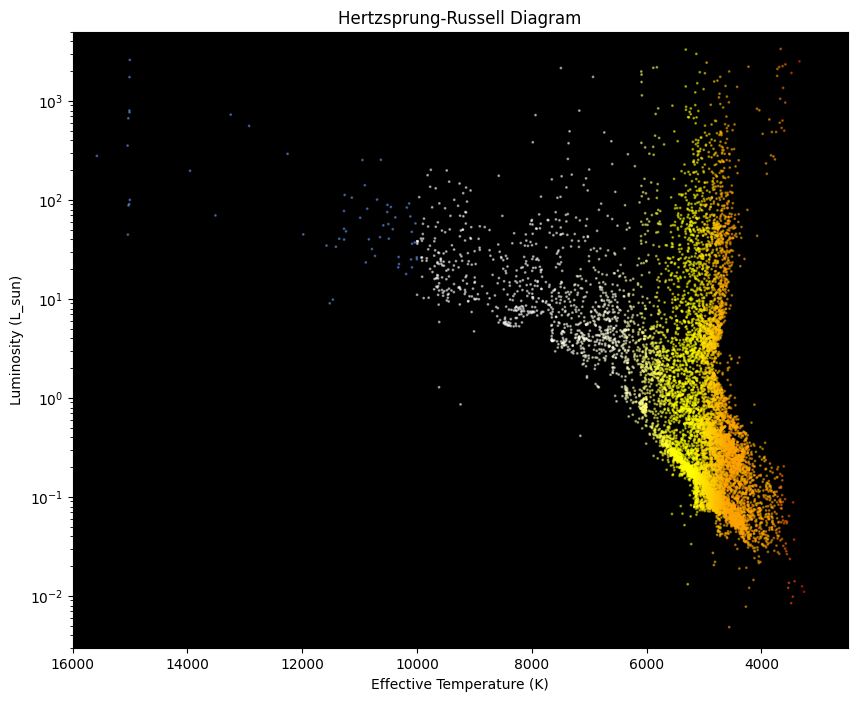

In [7]:
# HR diagram of 10000 GAIA3 samples
sc = [color(k) for k in data['teff_gspphot']]

plt.figure(figsize=(10, 8))
plt.scatter(data['teff_gspphot'], data['lum_flame'], s=1, c=sc, alpha=0.5)

plt.gca().invert_xaxis()
plt.xlim(16000, 2500)
plt.yscale('log',base=10) 
plt.ylim(0.003, 5000)
plt.gca().set_facecolor('black')


plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (L_sun)')
plt.title('Hertzsprung-Russell Diagram')
plt.show()


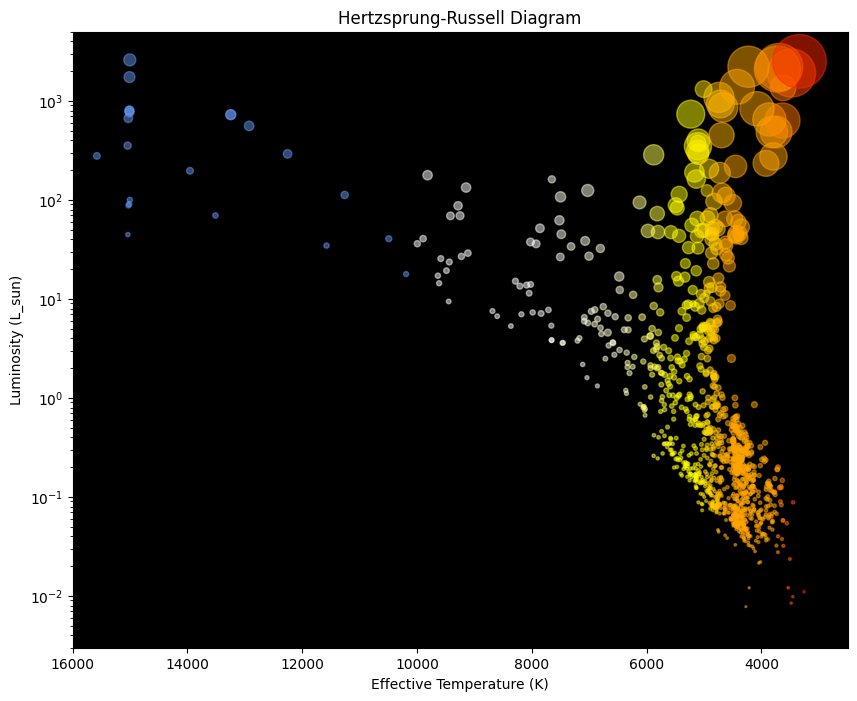

In [8]:
# HR of subset of previous 10000 samples with relative size
subset1 = data.loc[np.arange(0, 750, 1)]
subset2 = data[data['teff_gspphot'] < 4500]
subset3 = data[data['teff_gspphot'] > 12000]

data_subset = pd.concat([subset1, subset2.iloc[::3], subset3])

sc = [color(k) for k in data_subset['teff_gspphot']]
sz = data_subset['radius_flame']


plt.figure(figsize=(10, 8))
plt.scatter(data_subset['teff_gspphot'], data_subset['lum_flame'], s=sz * 10, c=sc, alpha=0.5)

plt.gca().invert_xaxis()
plt.xlim(16000, 2500)
plt.yscale('log',base=10) 
plt.ylim(0.003, 5000)
plt.gca().set_facecolor('black')


plt.xlabel('Effective Temperature (K)')
plt.ylabel('Luminosity (L_sun)')
plt.title('Hertzsprung-Russell Diagram')
plt.show()


In [9]:
sm_evolution = pd.read_csv('star_1_solar_mass.csv', delimiter=',')
print(sm_evolution.head())

       Time   Radius (R_sun)   Luminosity (L_sun)   Surface Temperature (K)  \
0    0.0000            0.901              0.93411                      6005   
1   90.8365            0.904              0.93929                      6005   
2  181.6730            0.906              0.94450                      6005   
3  272.5090            0.909              0.94995                      6005   
4  363.3460            0.911              0.95565                      6005   

    Mass (M_sun)  
0            1.0  
1            1.0  
2            1.0  
3            1.0  
4            1.0  


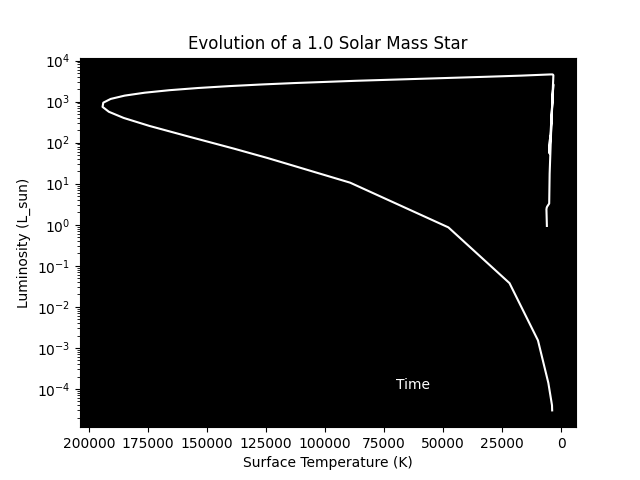

In [54]:
%matplotlib ipympl
x = sm_evolution[' Surface Temperature (K)']
y = sm_evolution[' Luminosity (L_sun)']
a = sm_evolution['Time']

fig, ax = plt.subplots()
line1, = ax.plot(x, y, color = "w")
text = ax.text(70000, 0.0001, "Time", color = "w")

def update(num, x, y, line1, text):
    line1.set_data(x[:num], y[:num])
    text.set_text(str(a[num]) + " million years")
    return [line1, text]

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line1, text],
              interval=1, blit=False)

ax.invert_xaxis()
ax.set_facecolor('black')
ax.set_yscale('log',base=10) 
ax.set_xlabel('Surface Temperature (K)')
ax.set_ylabel('Luminosity (L_sun)')
ax.set_title('Evolution of a 1.0 Solar Mass Star')

plt.show()